In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [13]:
# Creating a blank image
def load_img():
    blank_img = np.zeros((600,600))
    font = cv2.FONT_HERSHEY_COMPLEX_SMALL
    cv2.putText(blank_img,text="ABCDE", fontFace=font,fontScale = 5, color = (255,255,255), thickness = 5, org = (0, 185) )
    return blank_img
    

In [14]:
# # Enlarging the size of the image 
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

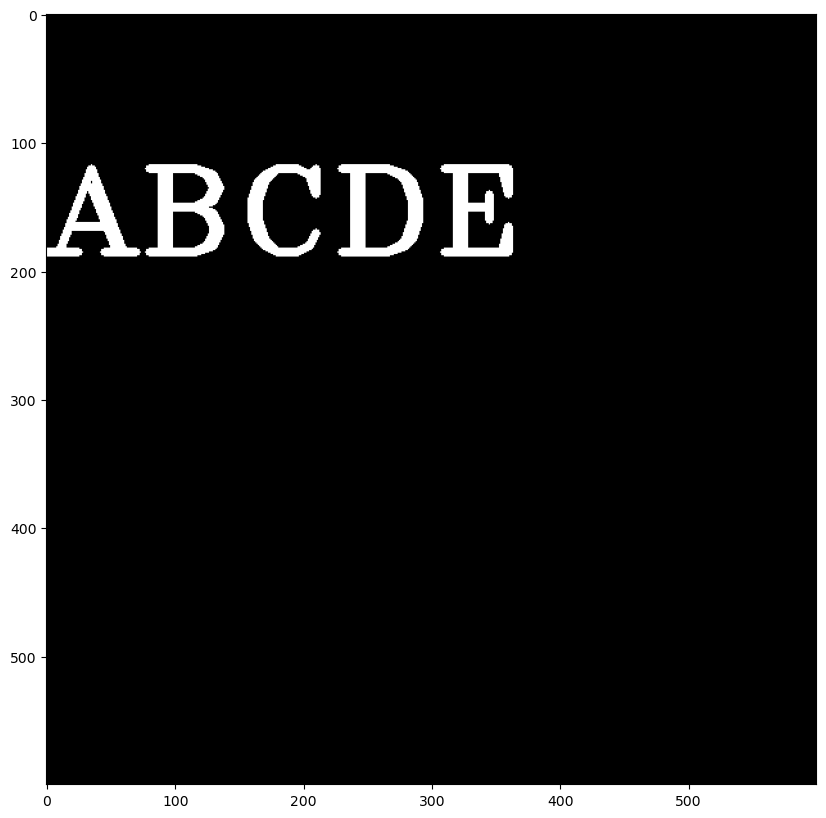

In [15]:
img = load_img()
display_img(img)

# Creating kernel for Erode 

In [33]:
kernel = np.ones((5,5),dtype=np.uint8)
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

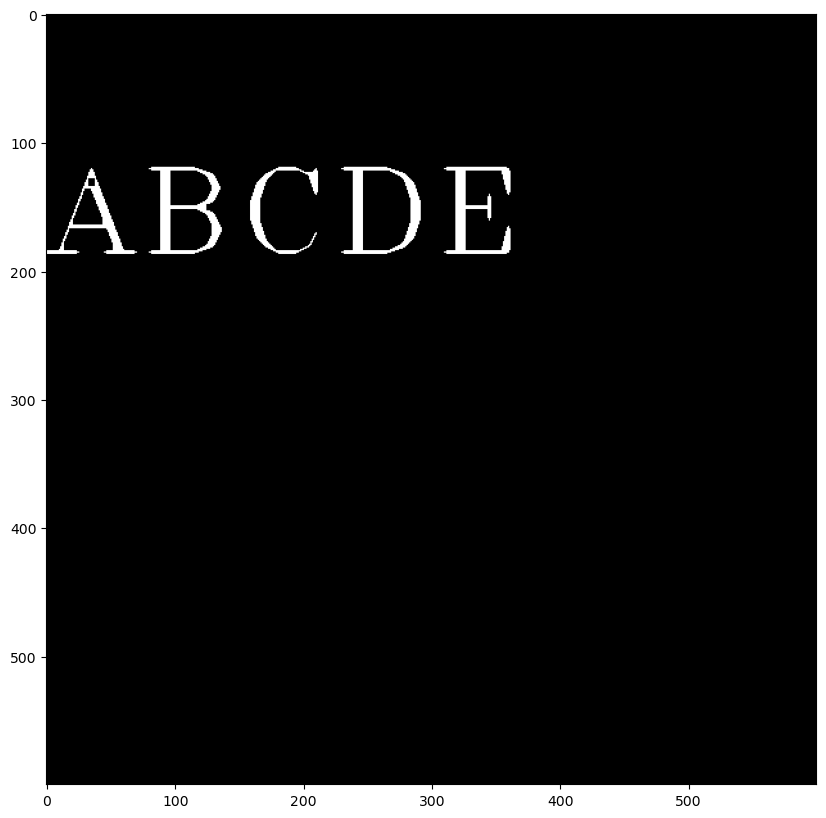

In [35]:
result = cv2.erode(img,kernel,5 )
display_img(result)

In [36]:
img = load_img()

In [37]:
# CREATING WHITE NOISE
white_noise = np.random.randint(low=0,high=2,size = (600,600))
white_noise

array([[1, 1, 0, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 1, 1],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 1, 1, 0],
       [0, 1, 1, ..., 1, 1, 0]])

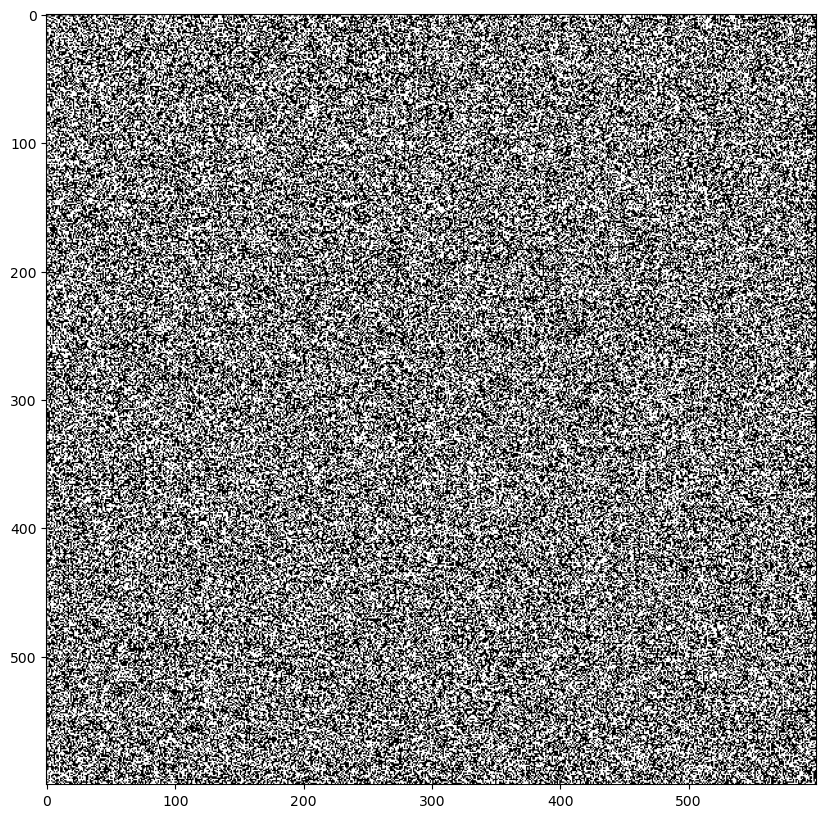

In [38]:
display_img(white_noise)

In [39]:
img.max()

255.0

In [40]:
# So, Here we are going to convert the noise_image 1's as 255
white_noise=white_noise*255
white_noise

array([[255, 255,   0, ...,   0, 255,   0],
       [  0,   0, 255, ...,   0, 255, 255],
       [  0, 255,   0, ...,   0,   0,   0],
       ...,
       [255, 255,   0, ..., 255,   0, 255],
       [  0,   0, 255, ..., 255, 255,   0],
       [  0, 255, 255, ..., 255, 255,   0]])

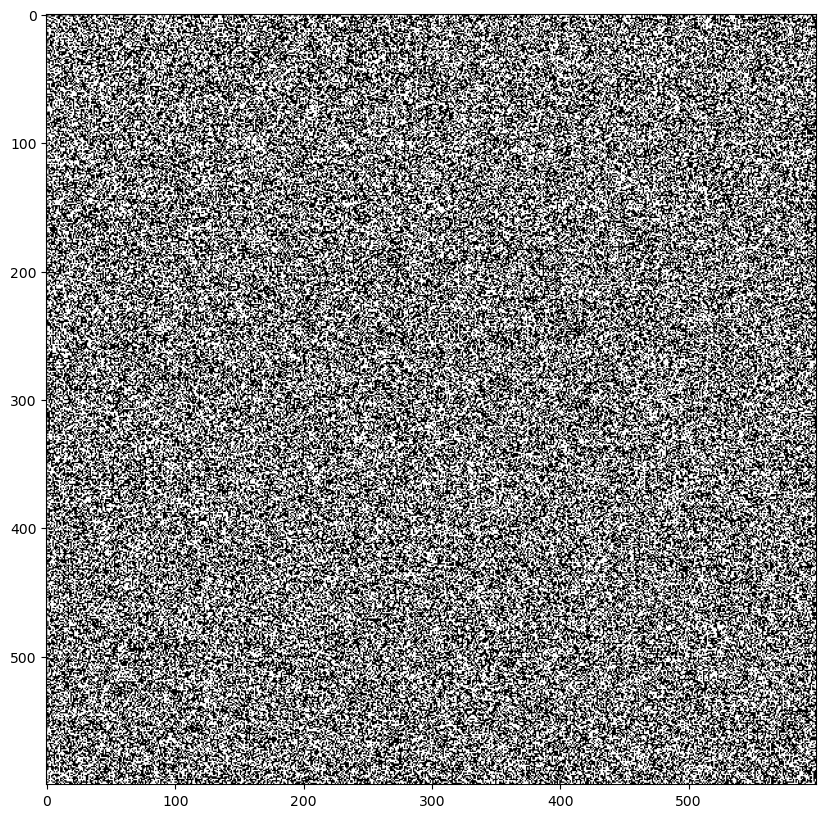

In [41]:
display_img(white_noise)

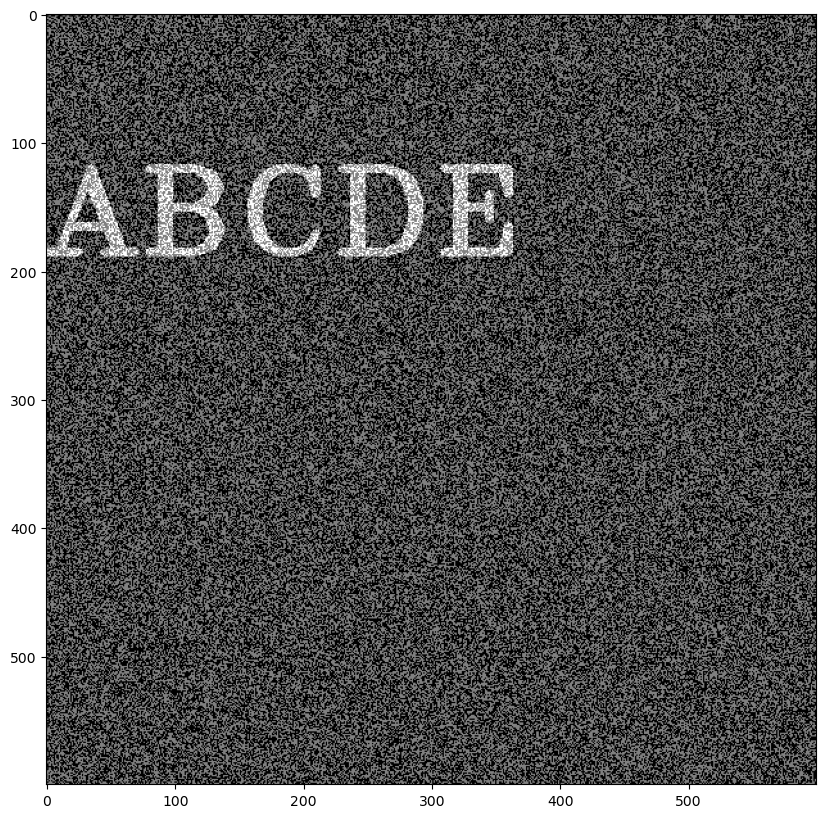

In [43]:
noise_img = white_noise+img
display_img(noise_img)

# Opening technique as Morphological Operators

#This Opening is very useful in removing background noise

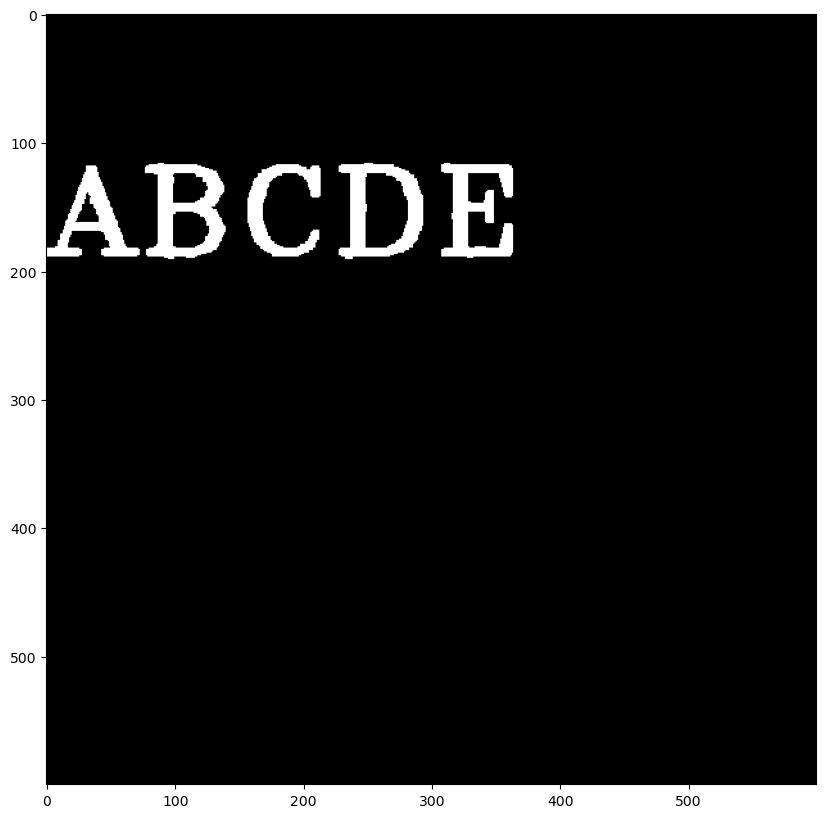

In [44]:
opening = cv2.morphologyEx(noise_img,cv2.MORPH_OPEN,kernel)
display_img(opening)

In [50]:
# Going to create an Image with FOREGROUND NOISE

img = load_img()

In [51]:
black_noise = np.random.randint(low=0,high=2,size=(600,600))
black_noise

array([[1, 0, 1, ..., 0, 0, 1],
       [0, 1, 1, ..., 1, 1, 0],
       [1, 0, 0, ..., 1, 1, 0],
       ...,
       [0, 1, 0, ..., 1, 0, 0],
       [0, 1, 0, ..., 0, 1, 0],
       [1, 1, 0, ..., 1, 0, 1]])

In [52]:
# Multiplying the 1's with -255
black_noise=black_noise*-255
black_noise

array([[-255,    0, -255, ...,    0,    0, -255],
       [   0, -255, -255, ..., -255, -255,    0],
       [-255,    0,    0, ..., -255, -255,    0],
       ...,
       [   0, -255,    0, ..., -255,    0,    0],
       [   0, -255,    0, ...,    0, -255,    0],
       [-255, -255,    0, ..., -255,    0, -255]])

In [55]:
black_noise_img = black_noise + img
black_noise_img

array([[-255.,    0., -255., ...,    0.,    0., -255.],
       [   0., -255., -255., ..., -255., -255.,    0.],
       [-255.,    0.,    0., ..., -255., -255.,    0.],
       ...,
       [   0., -255.,    0., ..., -255.,    0.,    0.],
       [   0., -255.,    0., ...,    0., -255.,    0.],
       [-255., -255.,    0., ..., -255.,    0., -255.]])

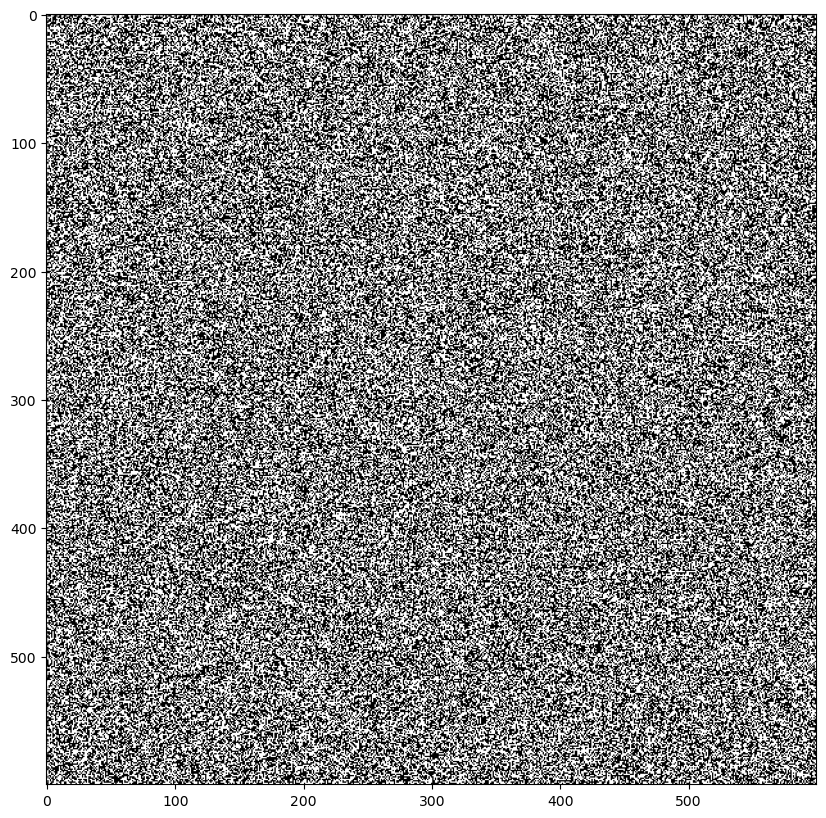

In [56]:
display_img(black_noise)

In [57]:
# Setting back the -255 with 0

black_noise_img[black_noise_img==-255] = 0
black_noise_img

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

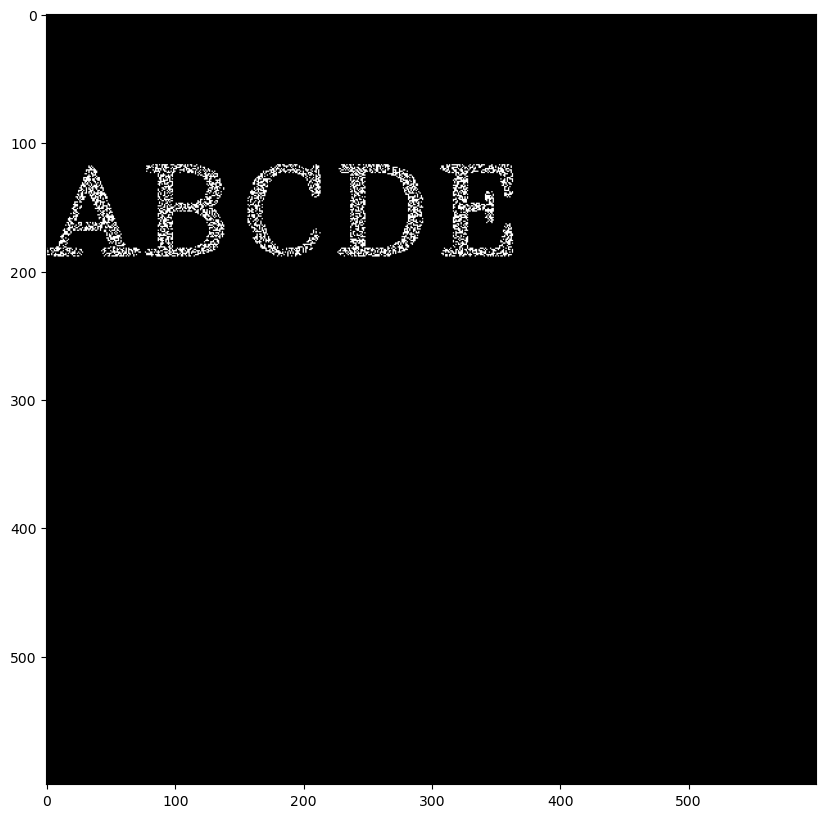

In [58]:
display_img(black_noise_img)

 # Closing technique as Morphological Operators

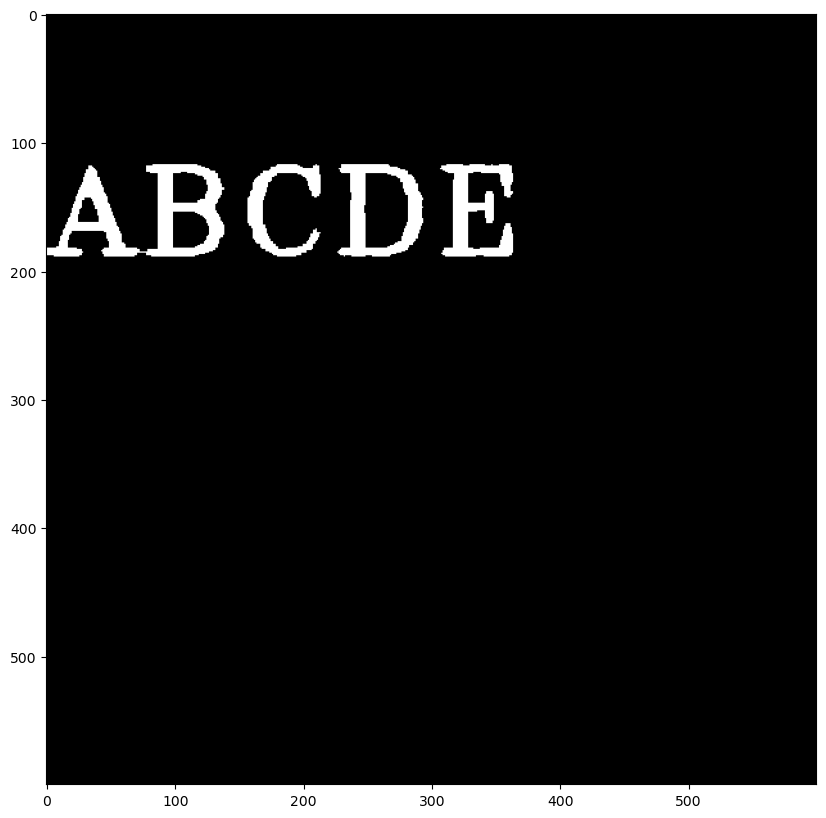

In [60]:
closing = cv2.morphologyEx(black_noise_img,cv2.MORPH_CLOSE,kernel)
display_img(closing)

# Morphological Gradient 
#This Morphological Gradient is, it takes the difference in b/w the erosion and dilation of the image

In [61]:
img = load_img()

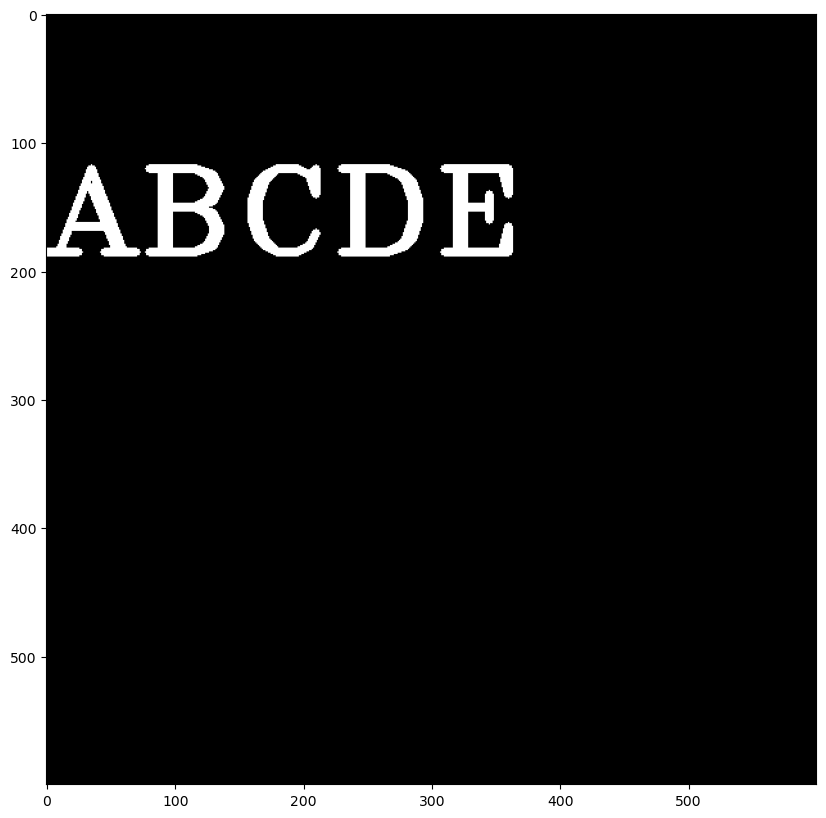

In [62]:
display_img(img)

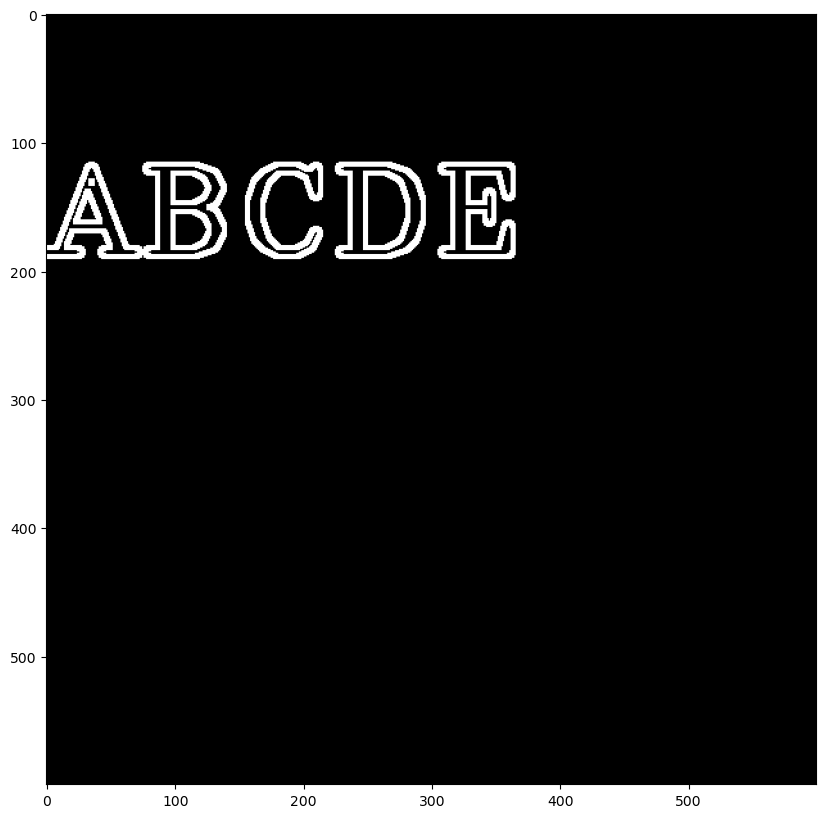

In [64]:
gradients = cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernel)
display_img(gradients)